In [35]:
!pip install numdifftools

initial value of x is: 0
initial value of y is: -7


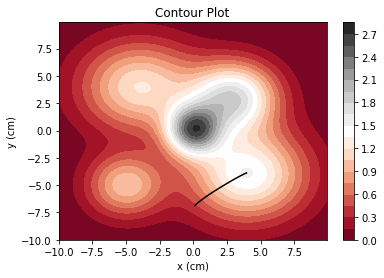

initial value of x is: 6
initial value of y is: 4


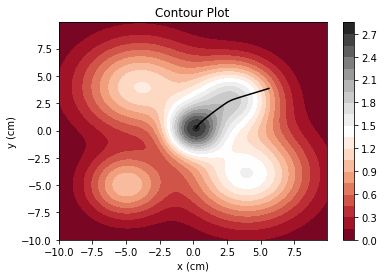

initial value of x is: 2
initial value of y is: 7


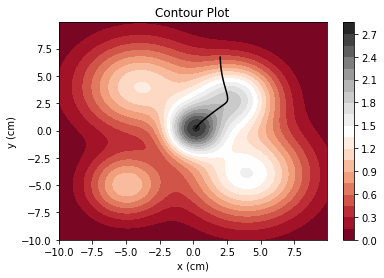

initial value of x is: -6
initial value of y is: 7


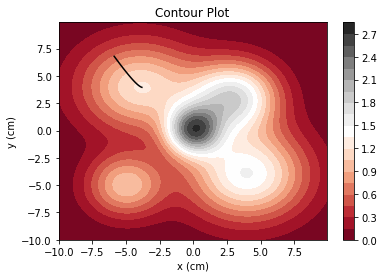

initial value of x is: 3
initial value of y is: -10


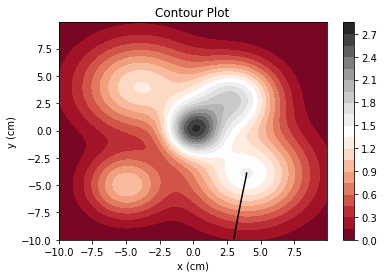

initial value of x is: 0
initial value of y is: -6


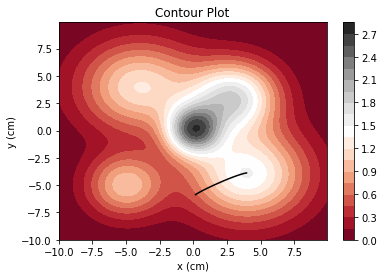

initial value of x is: -9
initial value of y is: 2


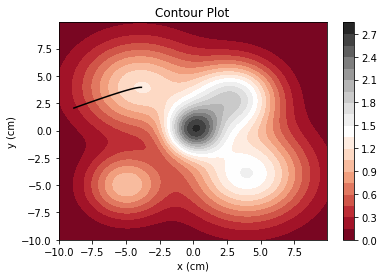

initial value of x is: 9
initial value of y is: 2


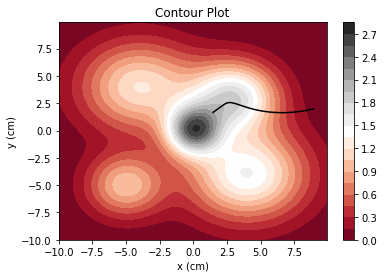

initial value of x is: -2
initial value of y is: -1


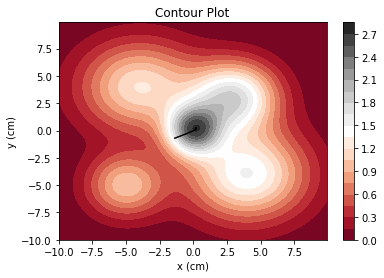

initial value of x is: 9
initial value of y is: 4


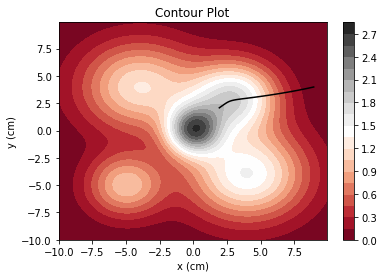

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import pylab
import numdifftools as nd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline
def z(x,y):
  return 1.7*np.exp(-((np.square(x-3)/10)+(np.square(y-3))/10))+np.exp(-((np.square(x+5)/8)+(np.square(y+5)/8)))+2*np.exp(-((np.square(x)/4)+
          (np.square(y))/5))+1.5*np.exp(-((np.square(x-4)/18)+(np.square(y+4))/16))+1.2*np.exp(-((np.square(x+4)/18)+(np.square(y-4))/16))
def fun(x):
  return 1.7*np.exp(-((np.square(x[0]-3)/10)+(np.square(x[1]-3))/10))+np.exp(-((np.square(x[0]+5)/8)+(np.square(x[1]+5)/8)))+ 2*np.exp(-((np.square(x[0])/4)+
      (np.square(x[1]))/5))+1.5*np.exp(-((np.square(x[0]-4)/18)+ (np.square(x[1]+4))/16))+1.2*np.exp(-((np.square(x[0]+4)/18)+(np.square(x[1]-4))/16))          
x=np.arange(-10,10,0.1)
y=np.arange(-10,10,0.1)
X,Y=np.meshgrid(x,y)
Z=z(X,Y)
for i in range(10):
  x1=random.randint(-10,10)
  y1=random.randint(-10,10)
  print('initial value of x is:',x1)
  print('initial value of y is:',y1)
  dfun = nd.Gradient(fun)([x1, y1])
  grad_x=dfun[0]
  grad_y=dfun[1]
  learning_rate=1
  count=0
  theta_x=[]
  theta_y=[]
  for j in range(50):
    dfun = nd.Gradient(fun)([x1, y1])
    grad_x=dfun[0]
    grad_y=dfun[1]
    x1 = x1 + learning_rate *(grad_x)
    y1 = y1 + learning_rate *(grad_y)
    theta_x.append(x1)
    theta_y.append(y1)
    count=count+1  
   
  # X, Y=np.meshgrid(theta_x,theta_y)
  # z_new=z(X, Y)
  cp=plt.contourf(X, Y, Z, 20, cmap='RdGy')
  plt.plot(theta_x,theta_y,'k')
  plt.colorbar(cp)
  plt.title('Contour Plot')
  plt.xlabel('x (cm)')
  plt.ylabel('y (cm)')
  plt.show()
  
  

In [41]:
x = np.arange(-10, 10,0.1)
y = np.arange(-10, 10,0.1)
X,Y = np.meshgrid(x,y)
def z1(x,y):
    z= (1.7*np.exp(-((((x - 3)**2)/10) + ((y-3)**2)/10))+
    np.exp(-((((x + 5)**2)/8) + ((y+5)**2)/8))+
    2.0*np.exp(-((((x)**2)/4) + ((y)**2)/5))+
    1.5*np.exp(-((((x - 4)**2)/18) + ((y+4)**2)/16))+
    1.2*np.exp(-((((x + 4)**2)/18) + ((y-4)**2)/16)))
    return z
z_new = z1(X,Y)

In [42]:

def Stochastic_search(Xmin,Xmax,popSize,nbhSize,maxIter):
    S_t=[]
    Y_t=[]
    for i in range(popSize):
      alpha=np.random.uniform(low = 0.0, high = 1.0, size = (2,1)) 
      x_ij=Xmin + alpha*((Xmax-Xmin))
      S_t.append((x_ij[0,0], x_ij[1,0]))
      Y_t.append(fun(x_ij))
    S_t=np.array(S_t)
    Y_t=np.array(Y_t)
    plt.contour(X,Y,z_new,cmap = 'RdGy')
    df1 = pd.DataFrame(S_t,columns = ['x','y'])
    plt.plot(df1['x'],df1['y'],'k*')
    title = "Initial Set of points"
    plt.xlabel("X Values")
    plt.ylabel("Y Values")
    plt.title(title)
    plt.show()
    for i in range(maxIter):
      U = Y_t - (Y_t.min())
      P = U/sum(U)
      Cdf_t = np.cumsum(P)
      S_child = []
      Y_child = []
      r_val = np.random.uniform(size = popSize)
      for values in r_val:
        for i in range(len(Cdf_t)):
          if (Cdf_t[i] >= values):
            idx = i
            break
        v_vector = np.random.uniform(-1,1,size = (2,1))
        unit_vec = v_vector/np.linalg.norm(v_vector)
        r = np.random.uniform(nbhSize)*unit_vec
        X_parent = (S_t[idx]).reshape(2,1)
        X_child = X_parent + r
        S_child.append((X_child[0,0],X_child[1,0]))
        Y_child.append(fun(X_child))
      S_child = np.array(S_child)
      Y_child = np.array(Y_child)
    ##union of parents and children
      S_combined = np.concatenate((S_t,S_child),axis = 0)
      Y_combined = np.concatenate((Y_t,Y_child),axis = 0)
      # #finding best solution set among parents and children
      ysor = -1*Y_combined
      sor_idx = np.argsort(ysor,axis = 0)
      S_t = np.take_along_axis(S_combined,sor_idx,axis = 0)[:popSize]
      Y_t = np.take_along_axis(Y_combined,sor_idx,axis = 0)[:popSize]
      # #plotting
      plt.contour(X,Y,z_new,cmap = 'RdGy')
      df1 = pd.DataFrame(S_t,columns = ['x','y'])
      plt.plot(df1['x'],df1['y'],'k*')
      title = "Solution Set for iteration"+str(i+1)
      plt.xlabel("X Values")
      plt.ylabel("Y Values")
      plt.title(title)
      plt.show()
    Xbest,Ybest,Fbest = S_t[0,0],S_t[0,1],Y_t[0,0]
    # #plotting
    Xbestp = round(Xbest,2)
    Xbestp = round(Ybest,2)
    plt.contour(X,Y,z_new,cmap ='RdGy')
    plt.plot(Xbest,Ybest,'r^')
    title = "Best Solution"
    plt.xlabel("X Values")
    plt.ylabel("Y Values")
    plt.title(title)
    plt.show()
    return Xbest,Ybest,Fbest 
  
 

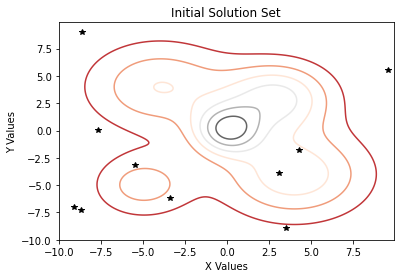

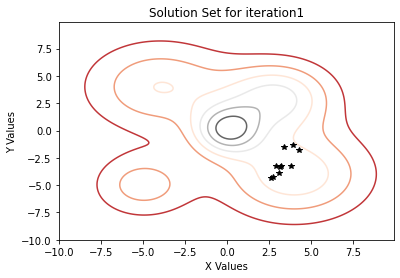

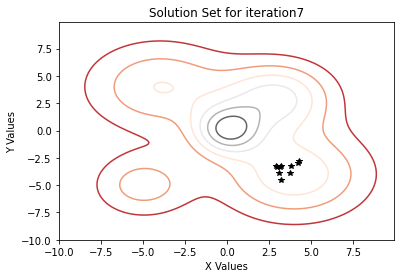

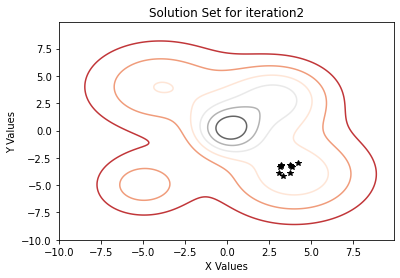

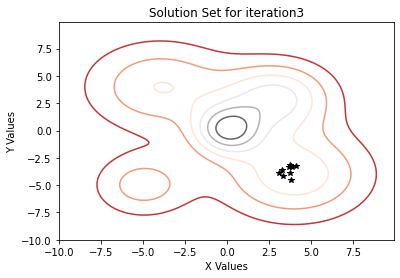

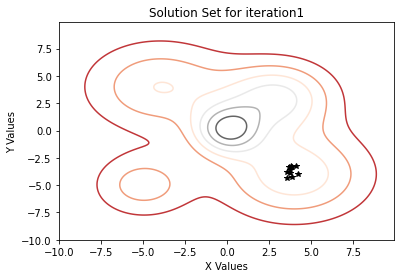

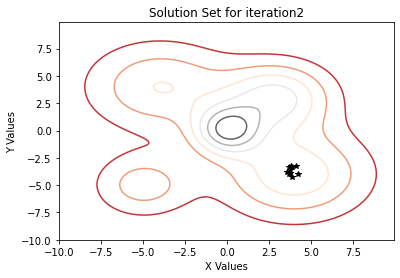

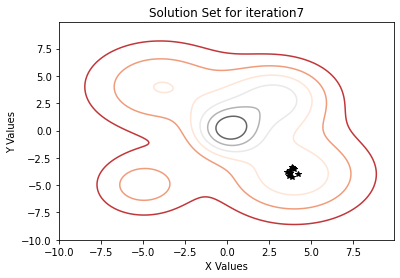

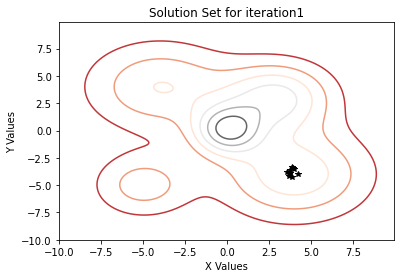

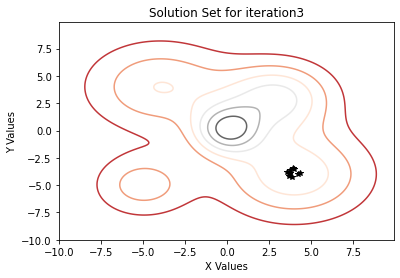

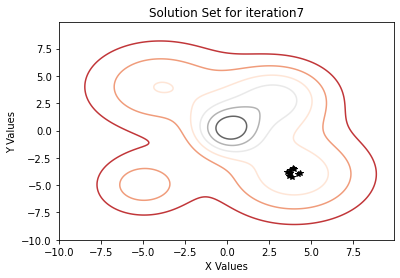

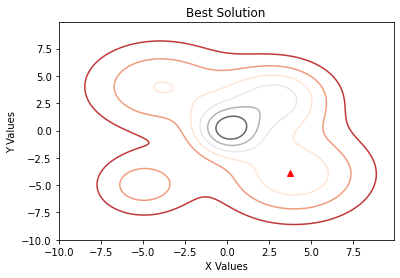

In [39]:
Xmin = np.array([-10,-10]).reshape(2,1)
Xmax = np.array([10,10]).reshape(2,1)
XB,YB,FB = Stochastic_search(Xmin,Xmax,10,0.5,10)